<a href="https://colab.research.google.com/github/fengyankai/CHL5230-Datathon-1/blob/Data-Analysis-Codes/Datathon__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
import numpy as np
from imblearn.over_sampling import SMOTE

In [4]:
# Read the data
BMI_data = pd.read_csv('/content/drive/My Drive/CHL5230/Datathon #1/CHL5230-F23-Datathon #1-Dataset1.csv')

In [5]:
# Glimpse of the data
print(BMI_data.head())

   Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0   56  Female            3091            90                160   
1   69  Female            2090           106                 27   
2   46    Male            2938            11                 45   
3   32  Female            3022            48                112   
4   60  Female            2350            83                115   

   Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  
0                    4            1  1.569070  81.199394  32.981343  
1                    0            9  1.629449  74.273566  27.973877  
2                    2            3  1.637726  71.453466  26.640417  
3                    1            8  1.514198  98.163045  42.813720  
4                    0            7  1.410559  57.323914  28.810685  


In [6]:
# Summary of the data
print(BMI_data.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

In [7]:
weight_status = []

# Iterate through the DataFrame and categorize based on BMI
for bmi in BMI_data['BMI']:
    if bmi < 18.5:
        weight_status.append('Underweight')
    elif 18.5 <= bmi < 25.0:
        weight_status.append('Normal Weight')
    elif 25.0 <= bmi < 30:
        weight_status.append('Overweight')
    else:
        weight_status.append('Obese')

# Add the 'Weight_status' column to the DataFrame
BMI_data['Weight_status'] = weight_status


In [8]:
# Encoding 'Gender' column
le = LabelEncoder()
BMI_data['Gender'] = le.fit_transform(BMI_data['Gender'])  # Male: 1, Female: 0

In [9]:
print(BMI_data)

       Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0       56       0            3091            90                160   
1       69       0            2090           106                 27   
2       46       1            2938            11                 45   
3       32       0            3022            48                112   
4       60       0            2350            83                115   
...    ...     ...             ...           ...                ...   
23530   51       0            2858            65                 37   
23531   20       0            2573            27                 27   
23532   26       0            2246            37                 44   
23533   22       1            1588            24                101   
23534   59       1            3099            59                 61   

       Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  \
0                        4            1  1.569070  81.199394  32.981343 

In [10]:
print(BMI_data.isna().sum())

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
Weight_status          0
dtype: int64


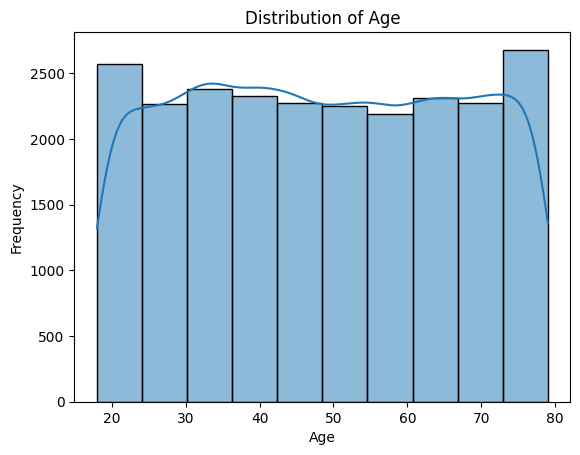

In [11]:
#  Histogram for Age
sns.histplot(BMI_data['Age'], bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


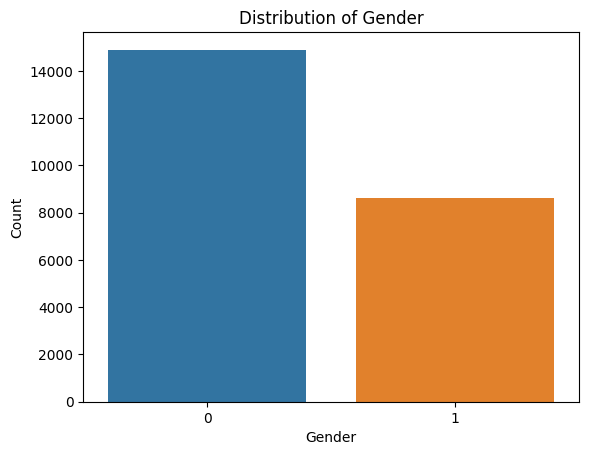

In [12]:
# Gender distribution

sns.countplot(data=BMI_data, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


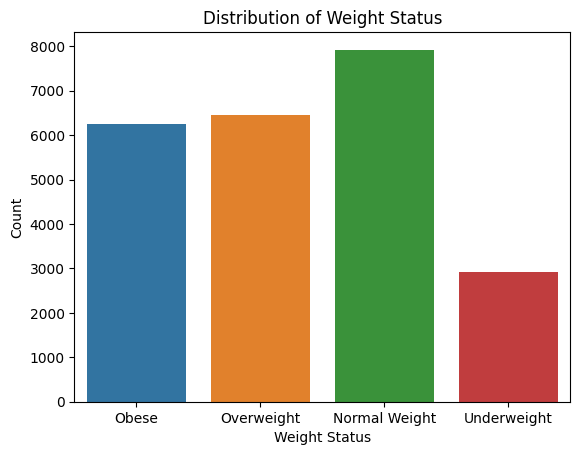

In [13]:
sns.countplot(data=BMI_data, x='Weight_status')
plt.xlabel('Weight Status')
plt.ylabel('Count')
plt.title('Distribution of Weight Status')
plt.show()

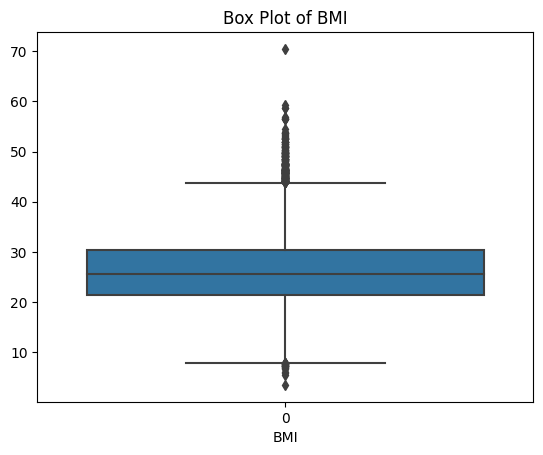

In [14]:
# Box plot for BMI
sns.boxplot(BMI_data['BMI'])
plt.xlabel('BMI')
plt.title('Box Plot of BMI')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) th

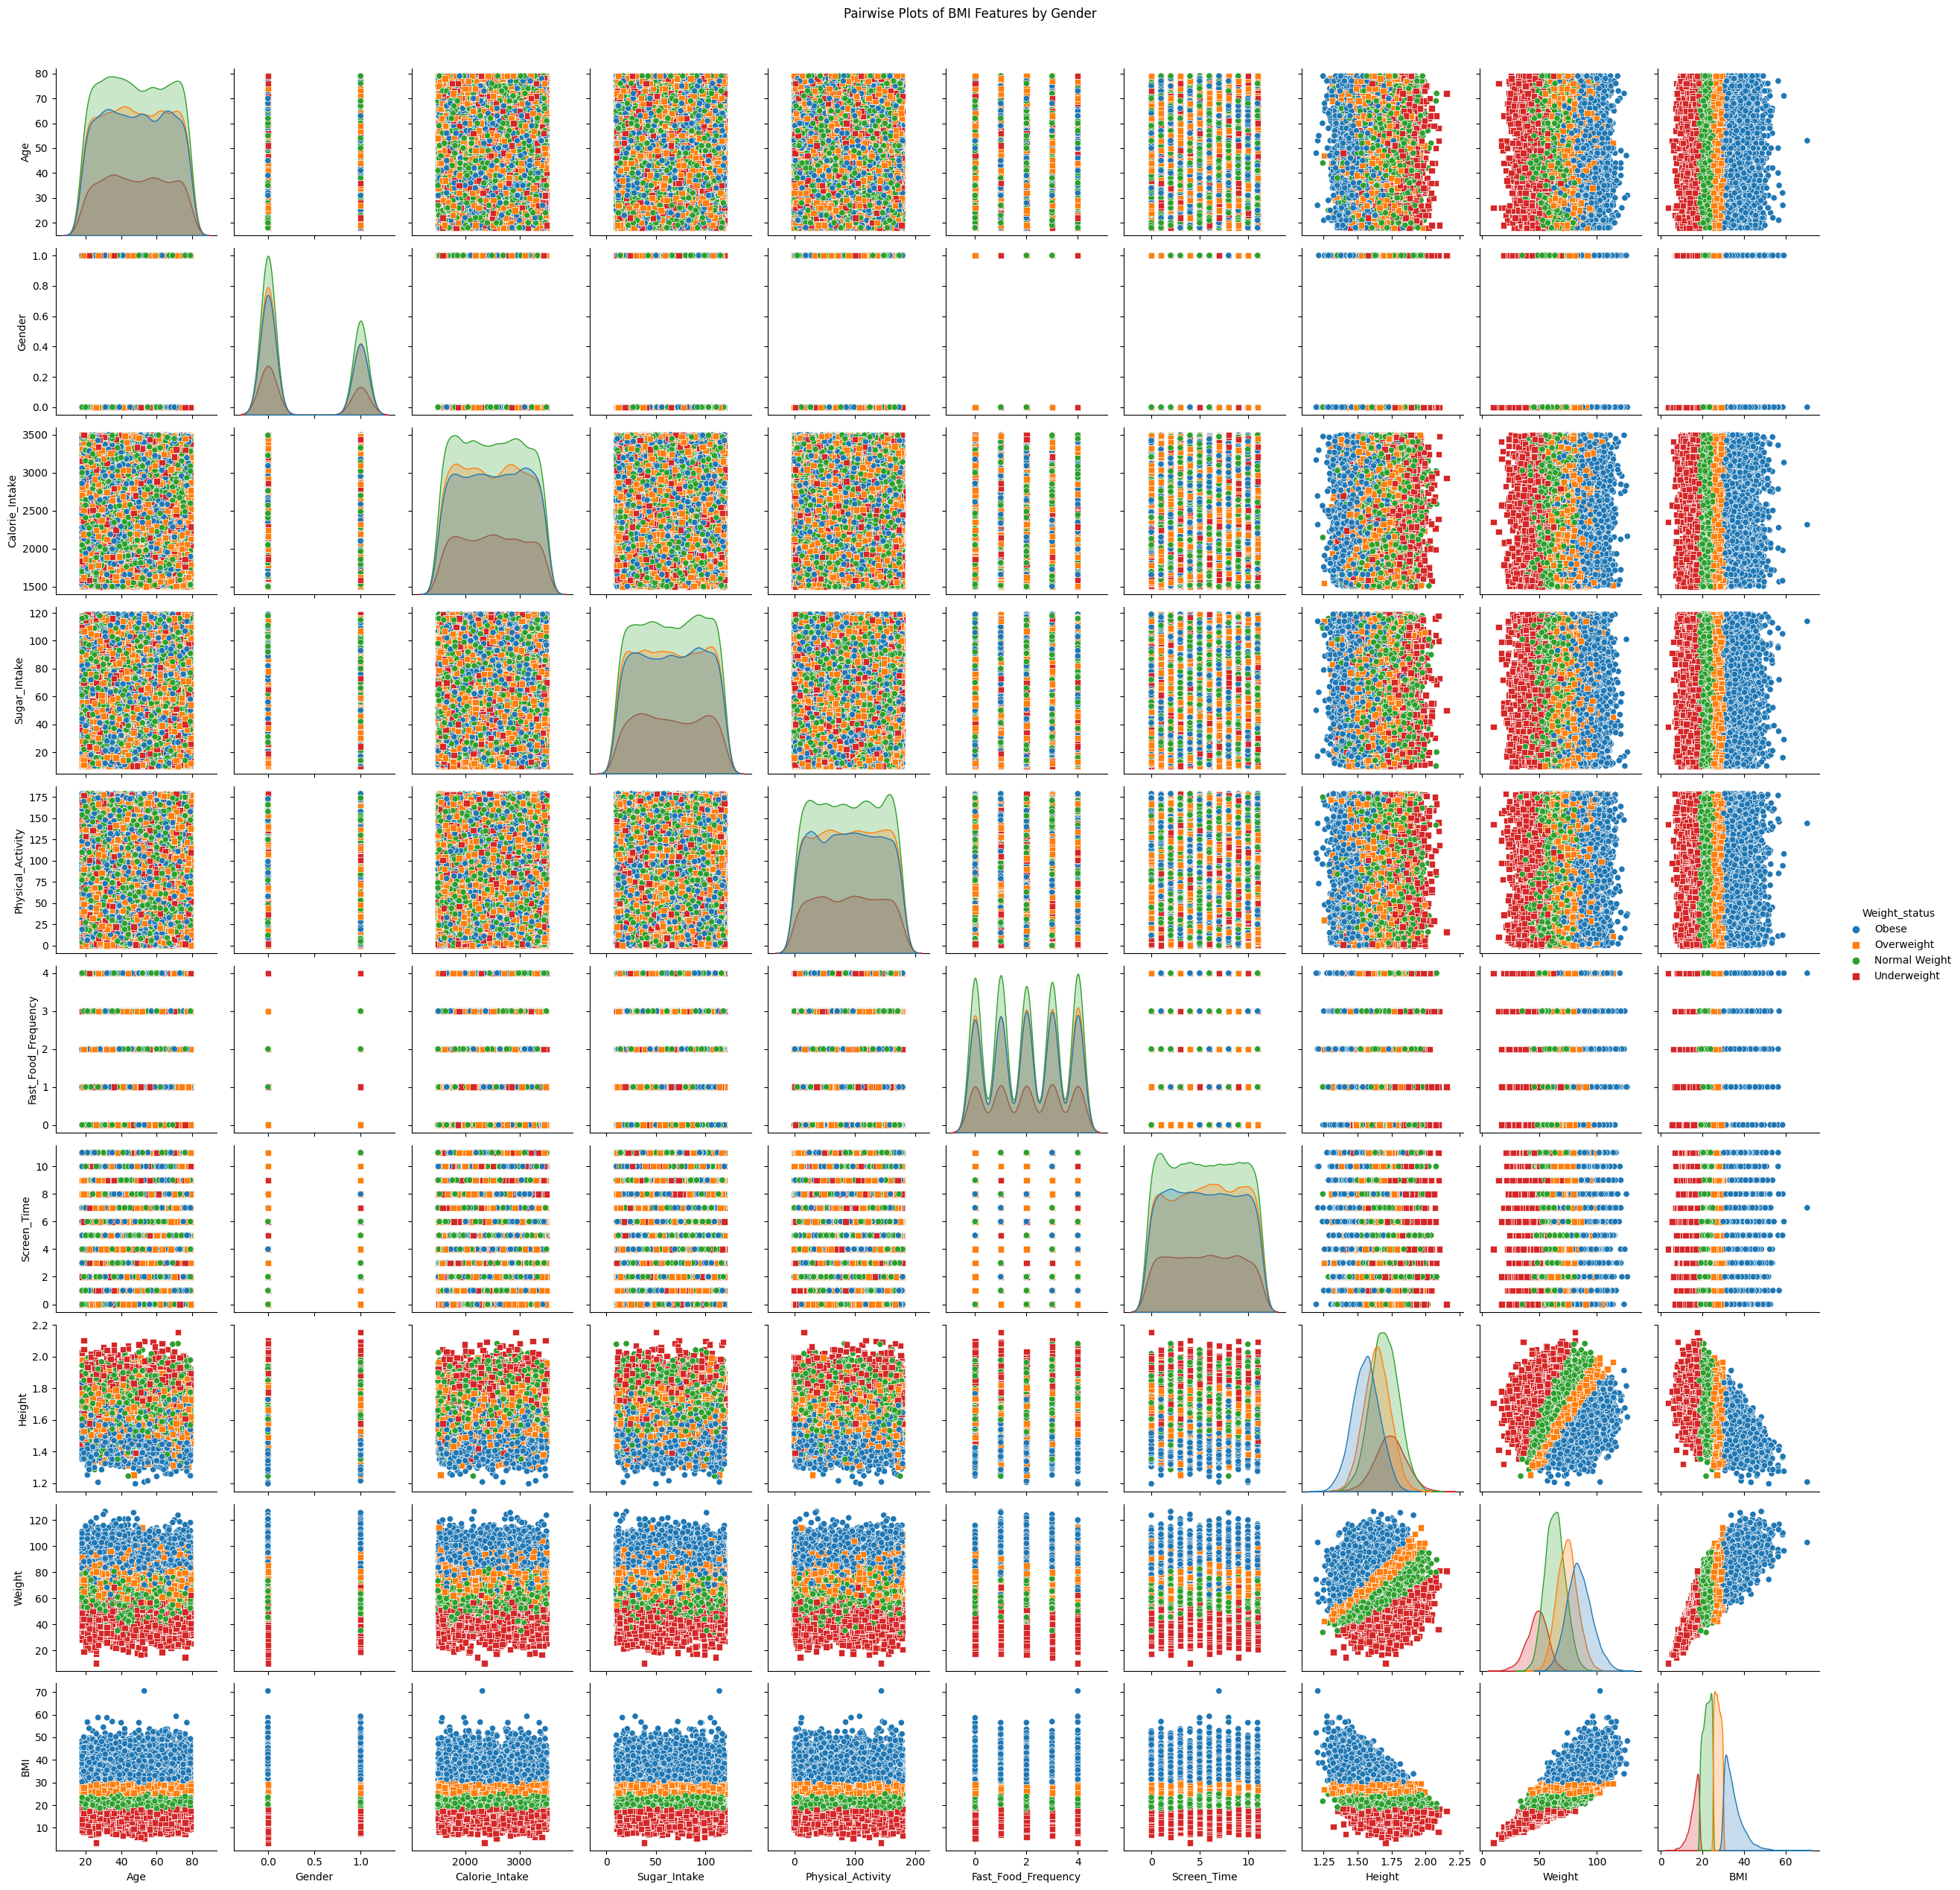

In [15]:
# Pairplot to visualize relationships between different features
sns.pairplot(BMI_data, diag_kind='kde', hue='Weight_status', markers=["o", "s"])
plt.suptitle("Pairwise Plots of BMI Features by Gender", y=1.02)
plt.show()


<ipython-input-16-be822aa81c70>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = BMI_data.corr()


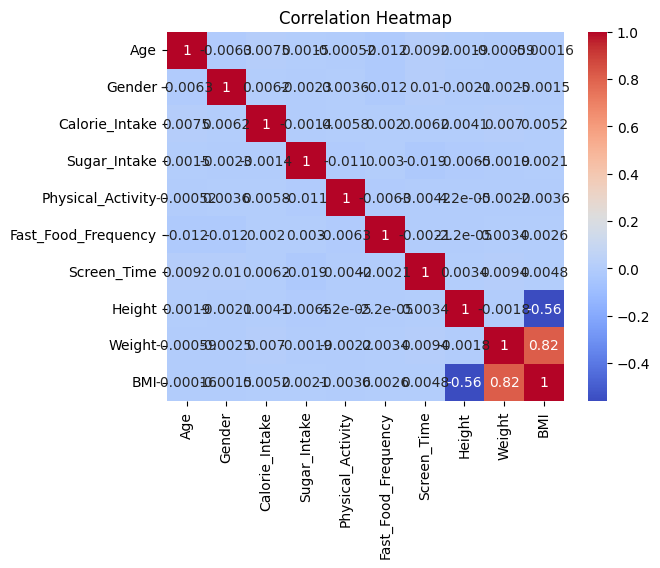

In [16]:
# Calculate the correlation matrix
correlation_matrix = BMI_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Calculate correlation between BMI and all possible feature variables
correlation_values = BMI_data.corr()['BMI'].drop('BMI')

# Print the list of correlation values
print("Correlation between BMI and feature variables:")
print(correlation_values)

Correlation between BMI and feature variables:
Age                   -0.000162
Gender                -0.001540
Calorie_Intake         0.005219
Sugar_Intake           0.002117
Physical_Activity     -0.003638
Fast_Food_Frequency    0.002556
Screen_Time            0.004798
Height                -0.560640
Weight                 0.815340
Name: BMI, dtype: float64


<ipython-input-17-9d6a96618ba7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_values = BMI_data.corr()['BMI'].drop('BMI')


In [30]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Prepare the feature matrix (X) and target variable (y)
X = BMI_data[['Age','Fast_Food_Frequency', 'Screen_Time','Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Gender','Weight']]
y = BMI_data['Weight_status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose a range of k values to test. In this case, we'll test values from 1 to 49.
k_values = range(1, 154)

# A list to keep track of the error rates for each k value.
errors = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, y_train)

    # Predict the labels for the test set.
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)



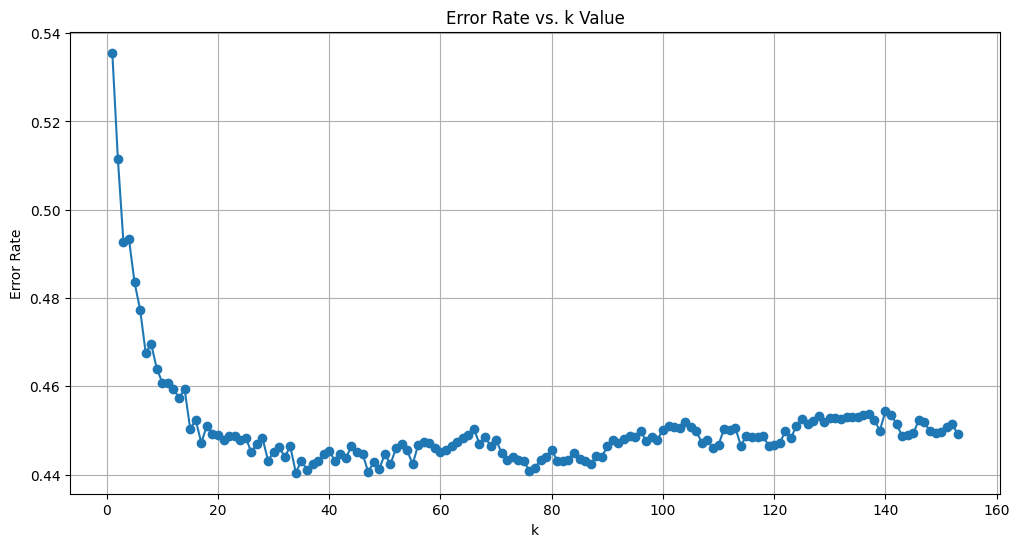

Best k value: 34
Lowest error rate: 0.4404


In [32]:
# Plotting
# This visualization helps in understanding the relationship between k value and the error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

best_k = k_values[np.argmin(errors)]
# Print the best k value and its corresponding accuracy
print(f"Best k value: {best_k}")
print(f"Lowest error rate: {min(errors):.4f}")

In [21]:
# Prepare the feature matrix (X) and target variable (y)
X = BMI_data[['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Gender', 'Weight']]
y = BMI_data['Weight_status']

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
knn = KNeighborsClassifier(n_neighbors=34)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=34)

In [26]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [27]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1168   93  269   32]
 [ 164  801  279    0]
 [ 498  357  431    2]
 [ 378    0    1  234]]
               precision    recall  f1-score   support

Normal Weight       0.53      0.75      0.62      1562
        Obese       0.64      0.64      0.64      1244
   Overweight       0.44      0.33      0.38      1288
  Underweight       0.87      0.38      0.53       613

     accuracy                           0.56      4707
    macro avg       0.62      0.53      0.54      4707
 weighted avg       0.58      0.56      0.55      4707



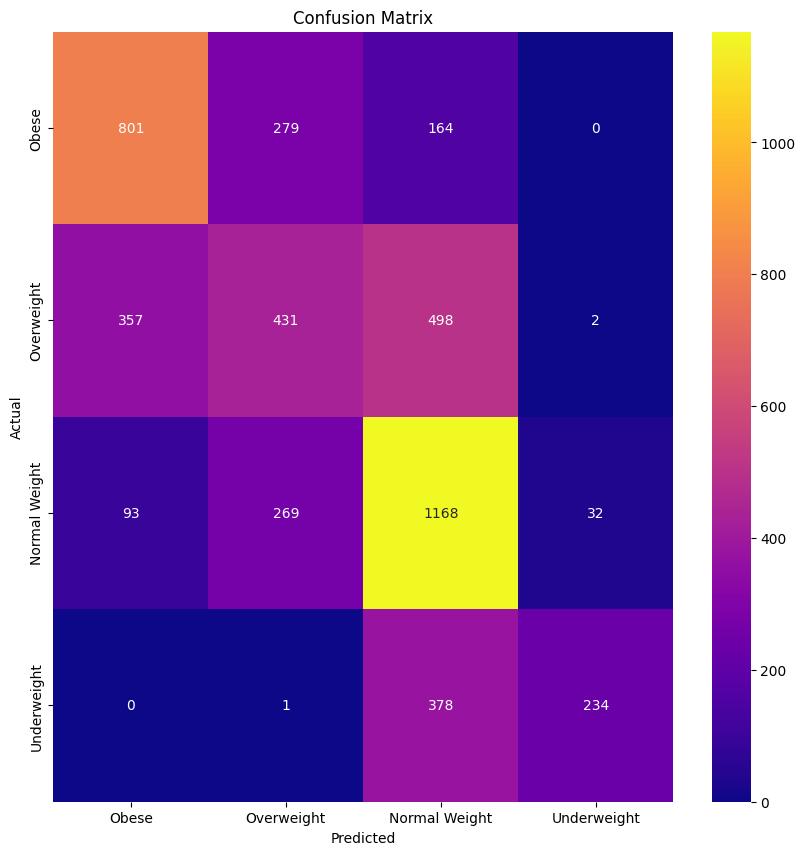

In [28]:
# Visualization of KNN Results Using a Confusion Matrix Heatmap

# Get unique classes
classes = BMI_data['Weight_status'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='plasma', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Running models sex-stratified
# females
BMI_data_female = BMI_data.loc[(BMI_data['Gender'] == 0)]
print(print(BMI_data_female))
print(BMI_data_female.describe())

       Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0       56       0            3091            90                160   
1       69       0            2090           106                 27   
3       32       0            3022            48                112   
4       60       0            2350            83                115   
9       75       0            2447            60                  0   
...    ...     ...             ...           ...                ...   
23528   62       0            2466            62                166   
23529   18       0            2049            92                 77   
23530   51       0            2858            65                 37   
23531   20       0            2573            27                 27   
23532   26       0            2246            37                 44   

       Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  \
0                        4            1  1.569070  81.199394  32.981343 

In [34]:
# Pairplot to visualize relationships between different features
sns.pairplot(BMI_data_female, diag_kind='kde', hue='Weight_status', markers=["o", "s"])
plt.suptitle("Pairwise Plots by Weight Status", y=1.02)
plt.show()

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7be829ecda20> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7be829eccca0> (for post_execute):


KeyboardInterrupt: ignored

In [35]:
# Running models sex-stratified
# Males
BMI_data_male = BMI_data.loc[(BMI_data['Gender'] == 1)]
print(BMI_data_male)
print(BMI_data_male.describe())

       Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
2       46       1            2938            11                 45   
5       25       1            1939            23                 71   
6       78       1            3156            21                119   
7       38       1            2213            90                112   
8       56       1            1931            87                 93   
...    ...     ...             ...           ...                ...   
23521   76       1            2489            14                153   
23523   60       1            2700            61                150   
23525   79       1            3021            42                148   
23533   22       1            1588            24                101   
23534   59       1            3099            59                 61   

       Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  \
2                        2            3  1.637726  71.453466  26.640417 

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) th

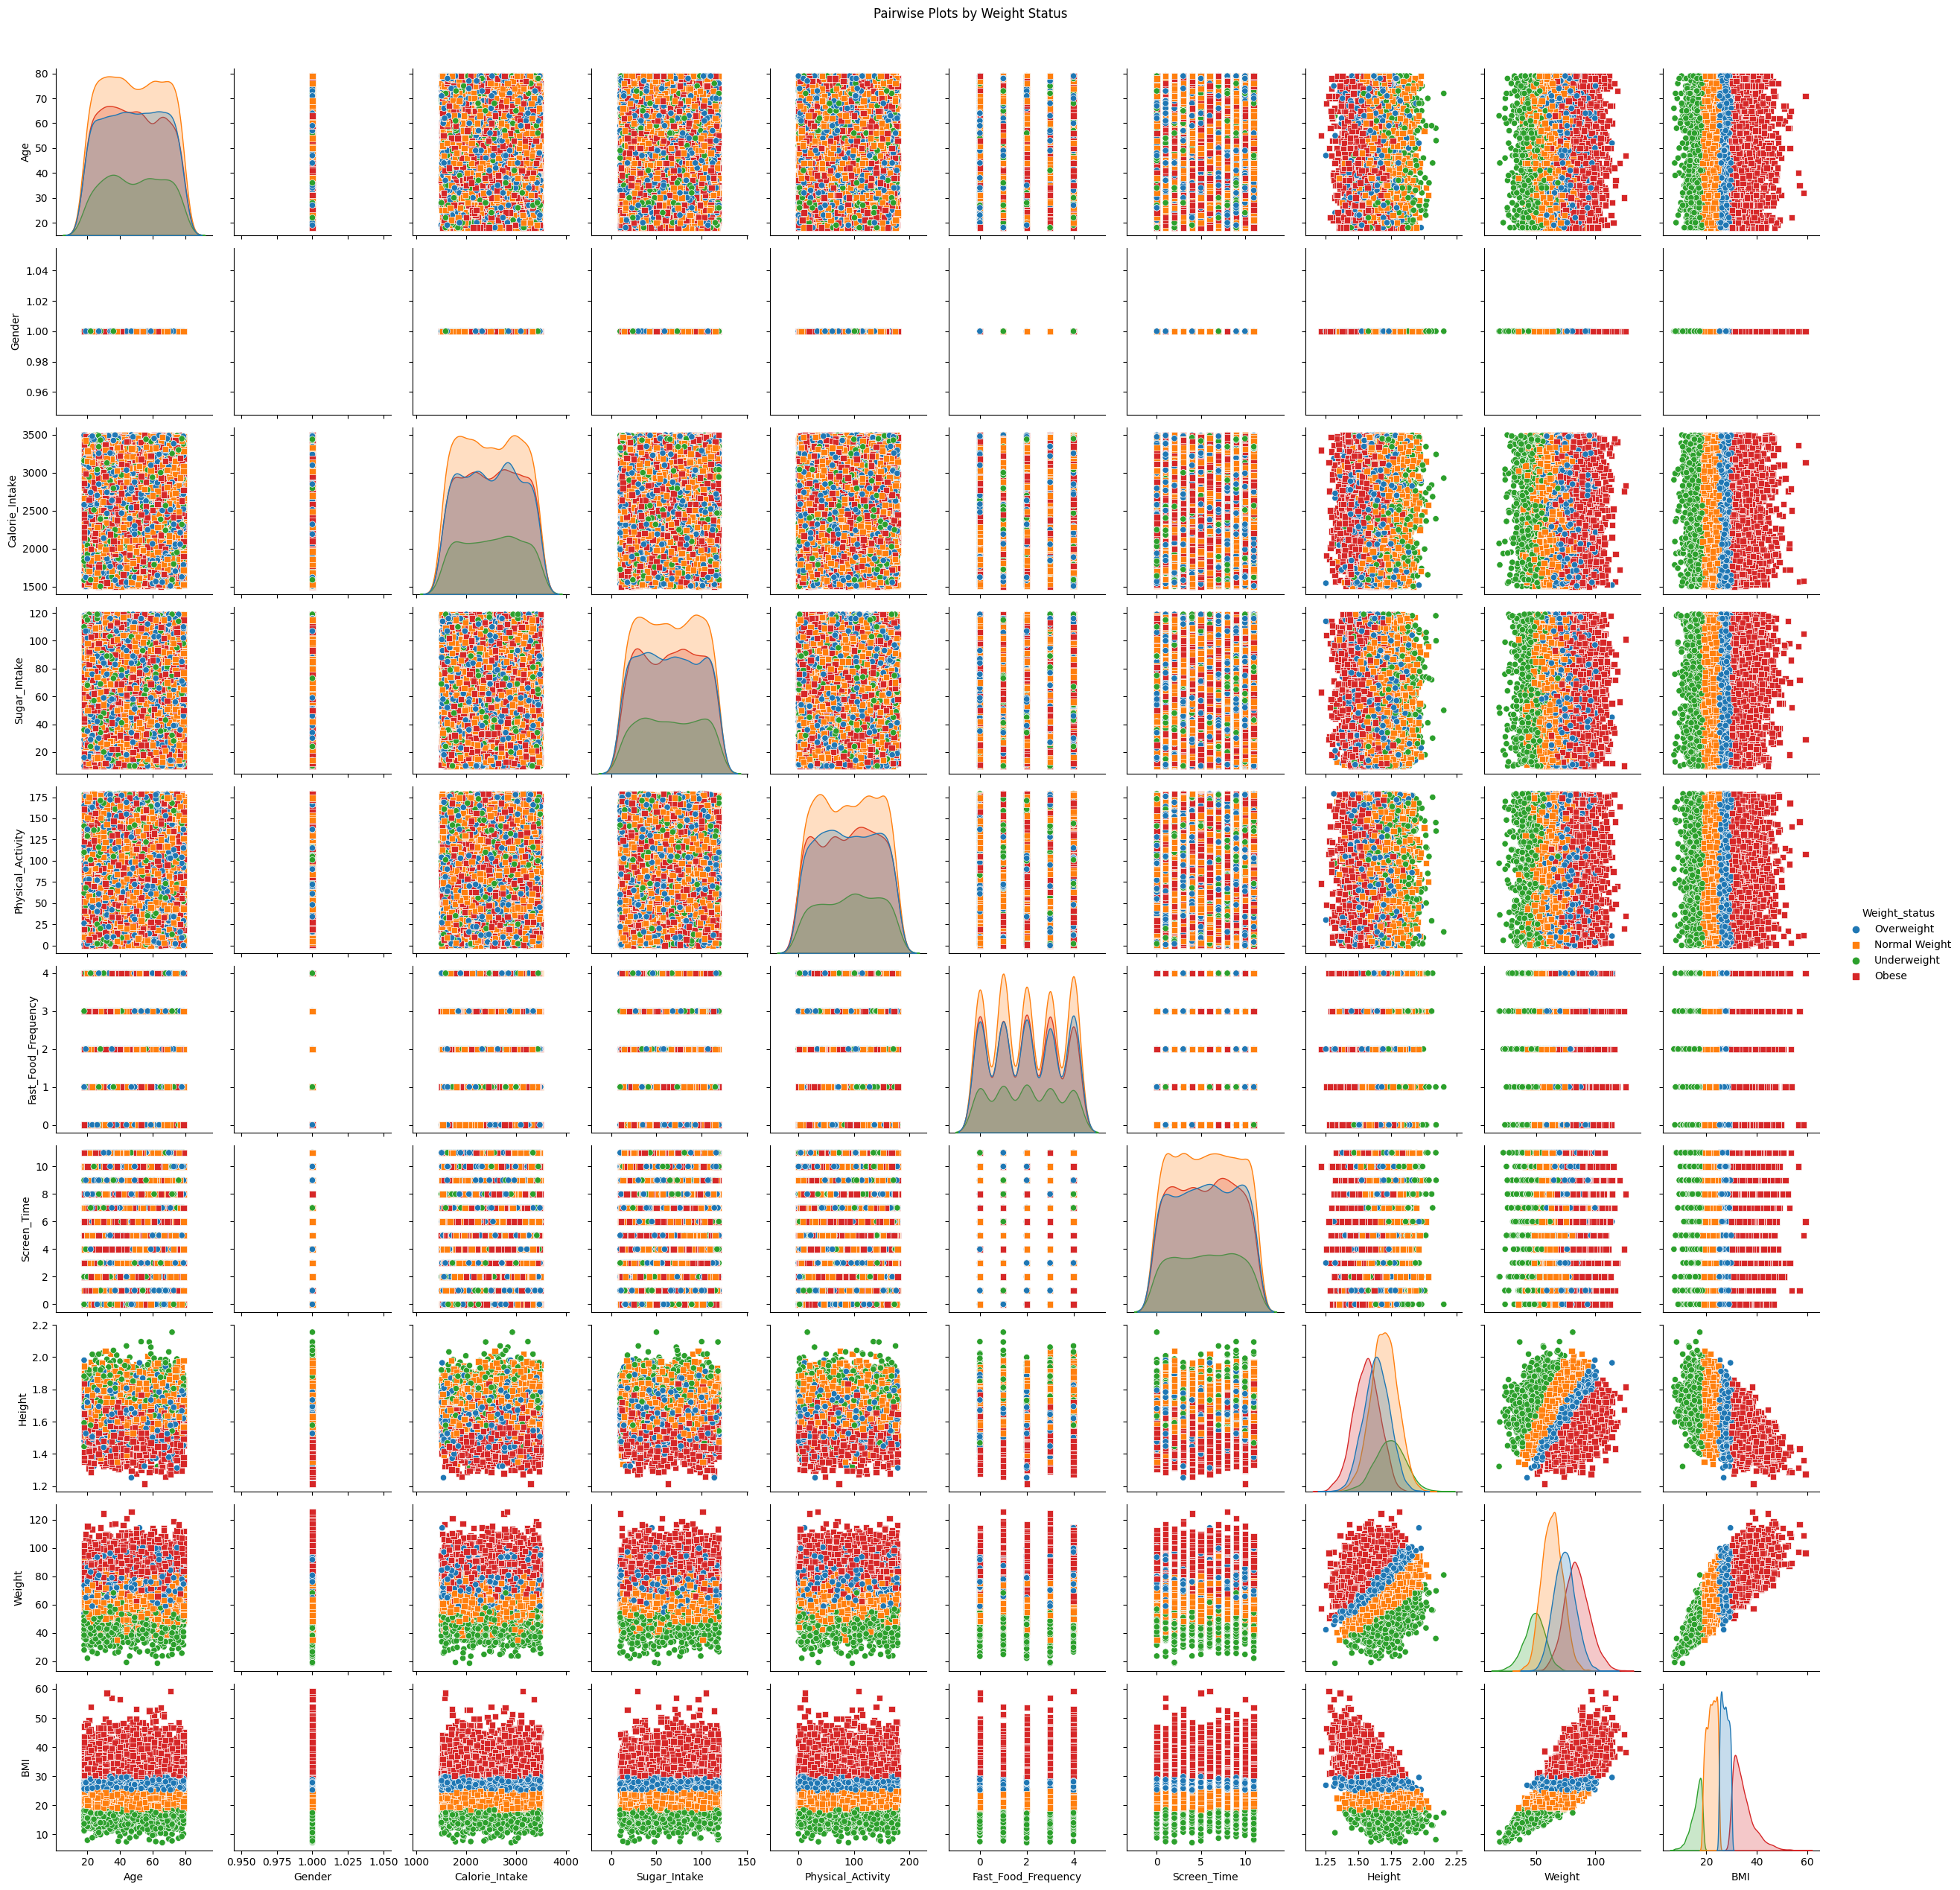

In [63]:
# Pairplot to visualize relationships between different features
sns.pairplot(BMI_data_male, diag_kind='kde', hue='Weight_status', markers=["o", "s"])
plt.suptitle("Pairwise Plots by Weight Status", y=1.02)
plt.show()

In [36]:
# Prepare the feature matrix (X_f, X_m) and target variable (y_f, y_m)
X_f = BMI_data_female[['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Weight']]
y_f = BMI_data_female['Weight_status']

X_m = BMI_data_male[['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Weight']]
y_m = BMI_data_male['Weight_status']

In [37]:
# Split the dataset into training and testing sets
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size=0.2, random_state=42)

X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.2, random_state=42)

In [38]:
# Scale the features
scaler = StandardScaler()
X_f_train = scaler.fit_transform(X_f_train)
X_f_test = scaler.transform(X_f_test)

X_m_train = scaler.fit_transform(X_m_train)
X_m_test = scaler.transform(X_m_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Choose a range of k values to test.
k_f_values = range(1, 123)

# A list to keep track of the error rates for each k value.
errors_f = []

# Loop over k_f_values to train and test the KNN classifier
for k in k_f_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_f_train, y_f_train)

    # Predict the labels for the test set.
    y_f_pred = knn.predict(X_f_test)

    # Calculate the error rate: 1 - accuracy.
    error_f = 1 - accuracy_score(y_f_test, y_f_pred)
    errors_f.append(error_f)

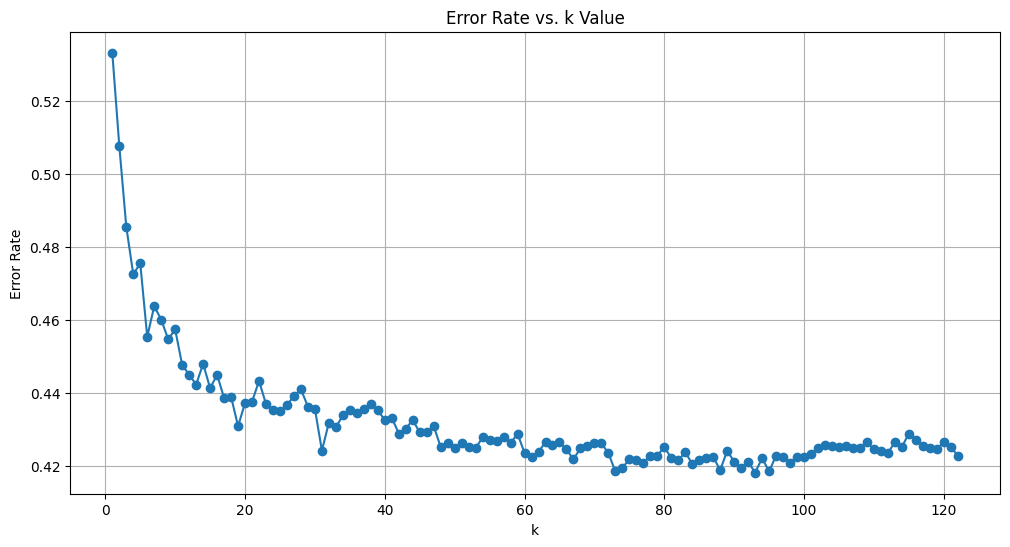

Best k value: 93
Lowest error rate: 0.4181


In [40]:
# Plotting
# This visualization helps in understanding the relationship between k value and the error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_f_values, errors_f, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

best_k = k_f_values[np.argmin(errors_f)]
# Print the best k value and its corresponding accuracy
print(f"Best k value: {best_k}")
print(f"Lowest error rate: {min(errors_f):.4f}")

In [41]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Choose a range of k values to test.
k_m_values = range(1, 93)

# A list to keep track of the error rates for each k value.
errors_m = []

# Loop over k_m_values to train and test the KNN classifier
for k in k_m_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_m_train, y_m_train)

    # Predict the labels for the test set.
    y_m_pred = knn.predict(X_m_test)

    # Calculate the error rate: 1 - accuracy.
    error_m = 1 - accuracy_score(y_m_test, y_m_pred)
    errors_m.append(error_m)

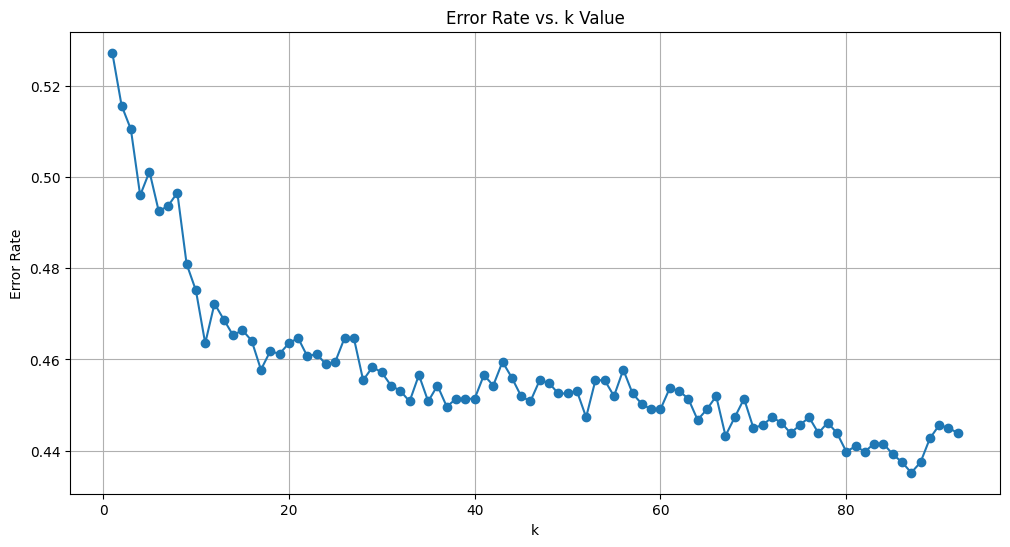

Best k value: 87
Lowest error rate: 0.4352


In [42]:
# Plotting
# This visualization helps in understanding the relationship between k value and the error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_m_values, errors_m, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

best_k = k_f_values[np.argmin(errors_m)]
# Print the best k value and its corresponding accuracy
print(f"Best k value: {best_k}")
print(f"Lowest error rate: {min(errors_m):.4f}")

In [43]:
knn_f = KNeighborsClassifier(n_neighbors=31)
knn_m = KNeighborsClassifier(n_neighbors=17)

In [44]:
knn_f.fit(X_f_train, y_f_train)

KNeighborsClassifier(n_neighbors=31)

In [45]:
knn_m.fit(X_m_train, y_m_train)

KNeighborsClassifier(n_neighbors=17)

In [46]:
# Make predictions on the test set
y_f_pred = knn_f.predict(X_f_test)

y_m_pred = knn_m.predict(X_m_test)

In [47]:
# Evaluate the model - females
print(confusion_matrix(y_f_test, y_f_pred))
print(classification_report(y_f_test, y_f_pred))

[[743  37 184  24]
 [105 505 204   0]
 [324 200 317   0]
 [183   0   3 151]]
               precision    recall  f1-score   support

Normal Weight       0.55      0.75      0.63       988
        Obese       0.68      0.62      0.65       814
   Overweight       0.45      0.38      0.41       841
  Underweight       0.86      0.45      0.59       337

     accuracy                           0.58      2980
    macro avg       0.63      0.55      0.57      2980
 weighted avg       0.59      0.58      0.57      2980



In [48]:
# Evaluate the model - males
print(confusion_matrix(y_m_test, y_m_pred))
print(classification_report(y_m_test, y_m_pred))

[[436  39  91  21]
 [ 72 291  99   0]
 [184 148 146   1]
 [131   1   4  64]]
               precision    recall  f1-score   support

Normal Weight       0.53      0.74      0.62       587
        Obese       0.61      0.63      0.62       462
   Overweight       0.43      0.30      0.36       479
  Underweight       0.74      0.32      0.45       200

     accuracy                           0.54      1728
    macro avg       0.58      0.50      0.51      1728
 weighted avg       0.55      0.54      0.53      1728



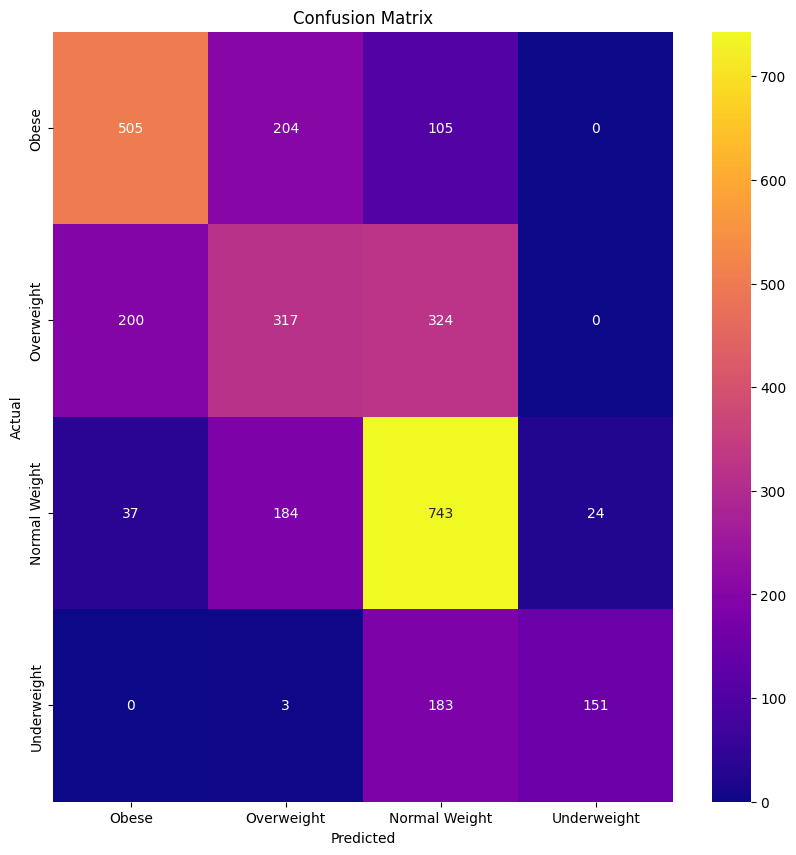

In [49]:
# Visualization of KNN Results Using a Confusion Matrix Heatmap - female

# Get unique classes
classes = BMI_data_female['Weight_status'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_f_test, y_f_pred, labels=classes), cmap='plasma', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

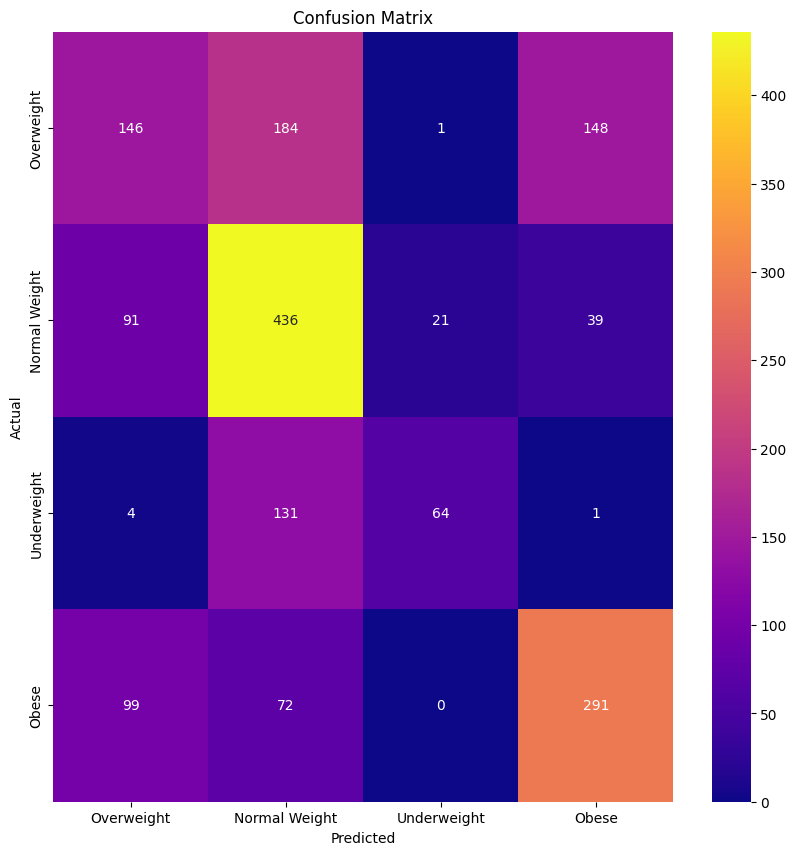

In [50]:
# Visualization of KNN Results Using a Confusion Matrix Heatmap - male

# Get unique classes
classes = BMI_data_male['Weight_status'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_m_test, y_m_pred, labels=classes), cmap='plasma', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [257]:
# K means analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check for missing values in the dataset
print(BMI_data.isna().sum())

# Display the data types of each column
BMI_data.dtypes

In [ ]:
# Add a Gender column with boolean values
BMI_data['Gender_male'] = BMI_data['Gender'] == 1
BMI_data.Gender_male.value_counts()

In [ ]:
BMI_data.head()

In [ ]:
# Required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#860991', '#d6ba2f', '#c4c1b3']
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i])
    # Display the plot
    plt.show()

In [ ]:
# Choose two features for clustering and visualization
features = ['BMI', 'Calorie_Intake']

In [ ]:
# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  BMI_data[features].to_numpy()

In [ ]:
# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

In [ ]:
# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

In [ ]:
# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)